# Lesson 1: Monkey Classifier

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

## Choose data to load and visualize examples

In [7]:
PATH = "data/monkeys"

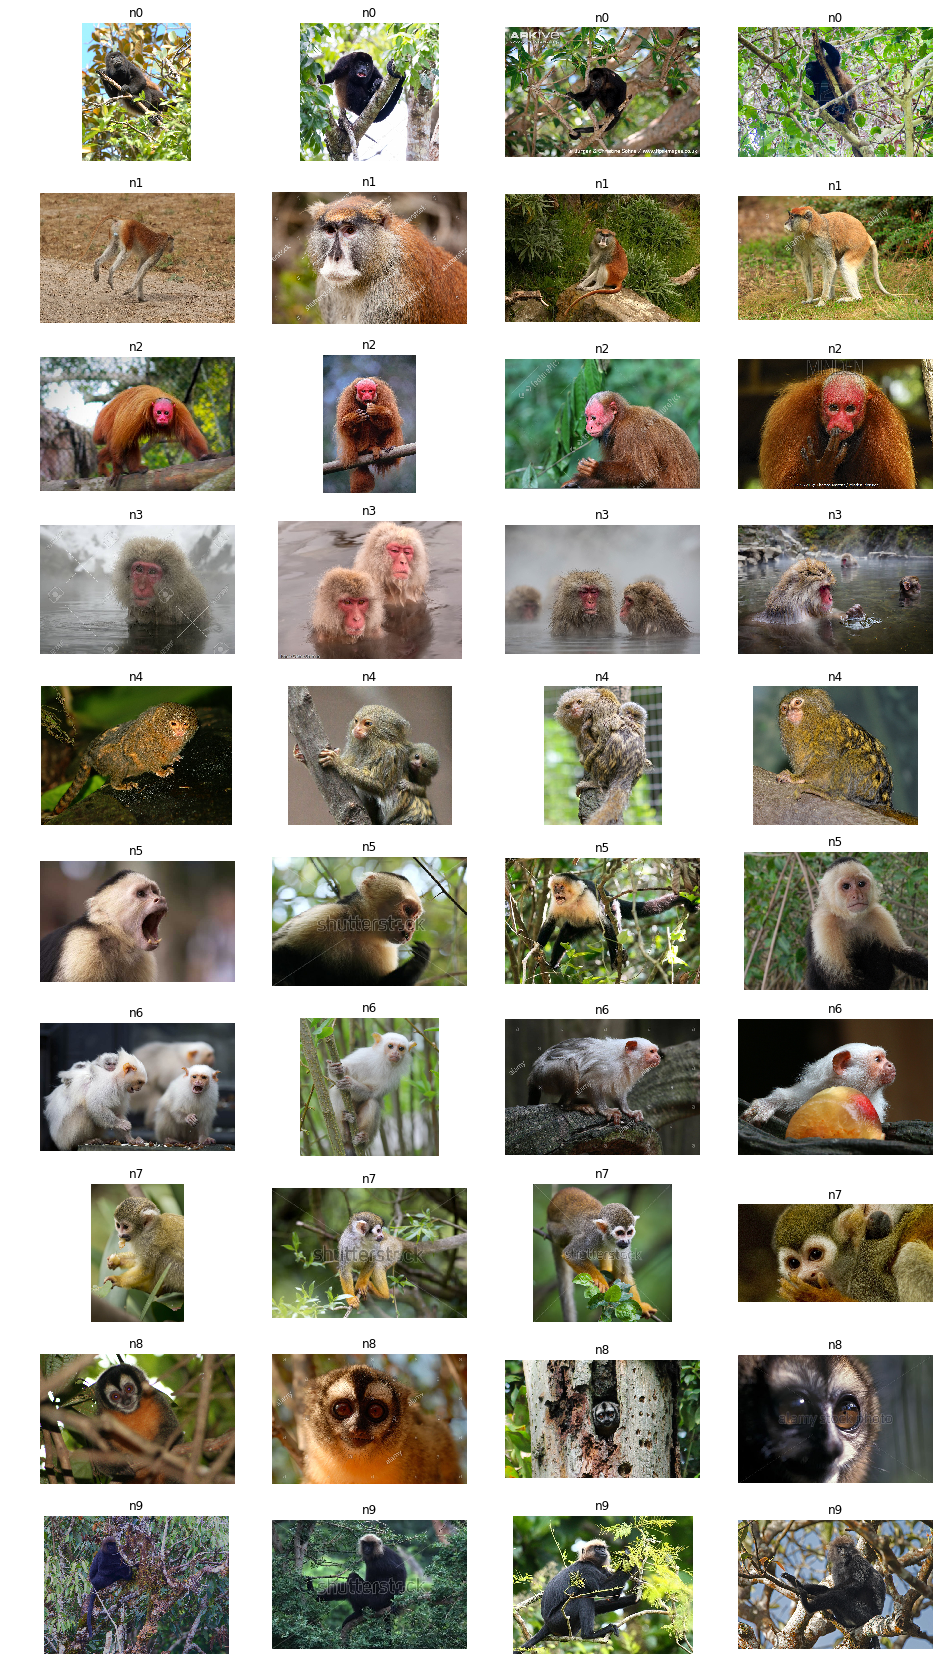

In [116]:
images_per_row = 4
classes = os.listdir(os.path.join(PATH, 'train'))

f = plt.figure(figsize=(16,30))
count = 0
for class_name in sorted(classes):
    image_filenames = os.listdir(os.path.join(PATH, 'train', class_name))
    
    for i in range(images_per_row):
        count += 1
        ax = f.add_subplot(len(classes), 4, count)
        
        ax.axis('Off')
        ax.set_title(class_name)
        image = plt.imread(os.path.join(PATH, 'train', class_name, image_filenames[i]))
        plt.imshow(image)

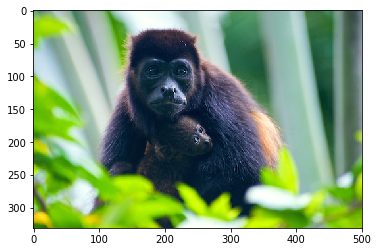

In [10]:
files = os.listdir(f'{PATH}/valid/n0')
img = plt.imread(f'{PATH}/valid/n0/{files[0]}')
plt.imshow(img);

In [11]:
img.shape

(331, 500, 3)

In [12]:
img[:4, :4]

array([[[108, 164, 119],
        [109, 162, 120],
        [108, 161, 119],
        [111, 159, 121]],

       [[113, 169, 120],
        [111, 167, 118],
        [112, 166, 117],
        [112, 164, 118]],

       [[116, 173, 118],
        [115, 172, 117],
        [115, 170, 113],
        [113, 168, 113]],

       [[117, 175, 114],
        [116, 175, 111],
        [114, 173, 109],
        [114, 170, 107]]], dtype=uint8)

## Train model on data

In [163]:
shutil.rmtree(f'{PATH}/tmp', ignore_errors=True)

In [164]:
size = 224
arch = resnet34

data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, size))
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 5/5 [00:01<00:00,  2.53it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      1.714354   240.9823   0.45      



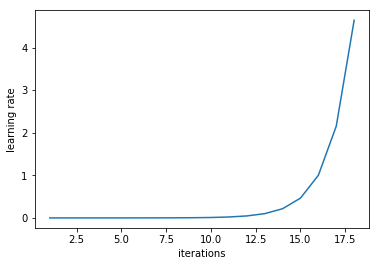

In [165]:
lrf = learn.lr_find()
learn.sched.plot_lr()

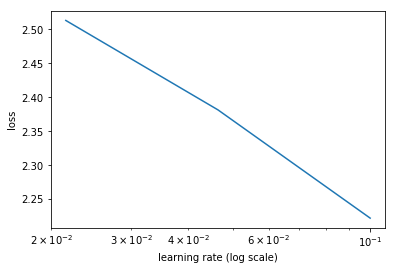

In [166]:
learn.sched.plot()

In [167]:
learn.fit(1e-3, 20)

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      2.360136   1.727066   0.494118  
    1      1.881721   1.001172   0.848346        
    2      1.481817   0.633803   0.913971        
    3      1.196804   0.466397   0.932721        
    4      0.968908   0.377261   0.94761          
    5      0.79891    0.310866   0.96011          
    6      0.67968    0.279421   0.963235         
    7      0.573576   0.245813   0.963235         
    8      0.493202   0.222352   0.98125          
    9      0.432582   0.204817   0.969485         
    10     0.376082   0.188324   0.98125          
    11     0.338246   0.170566   0.98125          
    12     0.307522   0.158188   0.98125                  
    13     0.280079   0.151656   0.978125         
    14     0.256541   0.148758   0.98125          
    15     0.234439   0.138642   0.98125          
    16     0.222395   0.132839   0.98125          
    17     0.204153   0.126369   0.98125          
    18     0.190961   0.121007   0

[0.11664064, 0.984375]

## Visualize learned classification results

### Define plotting functions

In [168]:
def rand_by_mask(mask):
    try:
        return np.random.choice(np.where(mask)[0], 4, replace=False)
    except ValueError:
        return np.random.choice(np.where(mask)[0], 4, replace=True)
        
def rand_by_correct(is_correct, preds):
    return rand_by_mask((preds == data.val_y)==is_correct)

In [169]:
def plots(imgs, figsize=(12, 6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(imgs)):
        sp = f.add_subplot(rows, len(imgs)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(imgs[i])

In [170]:
def load_img_id(ds, idx):
    return np.array(PIL.Image.open(os.path.join(PATH, ds.fnames[idx])))

In [186]:
def plot_val_with_title(idxs, title, probs, classes):
    imgs = [load_img_id(data.val_ds, x) for x in idxs]
    print(title)
    
    title_probs = ['%s: %1.1f%%' % (classes[i], probs[i]*100) for i in idxs]
    return plots(imgs, rows=1, titles=title_probs, figsize=(16, 8))

### Make predictions and visualize

In [187]:
log_preds = learn.predict()
log_preds.shape

(273, 10)

In [188]:
preds = np.argmax(log_preds, axis=1)
probs = np.array([np.exp(log_preds[i, preds[i]]) for i in range(len(preds))])
classes = [data.classes[pred] for pred in preds]

In [189]:
np.array(classes)

array(['n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n7', 'n0', 'n0', 'n0', 'n0',
       'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n0', 'n9', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1',
       'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1', 'n1',
       'n1', 'n1', 'n1', 'n1', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2',
       'n8', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n2', 'n3', 'n3', 'n3',
       'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3',
       'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n3', 'n4', 'n4', 'n4', 'n4', 'n4', 'n4', 'n4', 'n4',
       'n4', 'n4', 'n4', 'n4', 'n4', 'n4', 'n4', 'n4', 'n4', 'n4', 'n4', 'n2', 'n4', 'n4', 'n4', 'n4', 'n4',
       'n4', 'n4', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5', 'n5',
       'n5', 'n5', 

In [190]:
rand_by_correct(True, preds)

array([215, 188, 100,  44])

Correctly classified


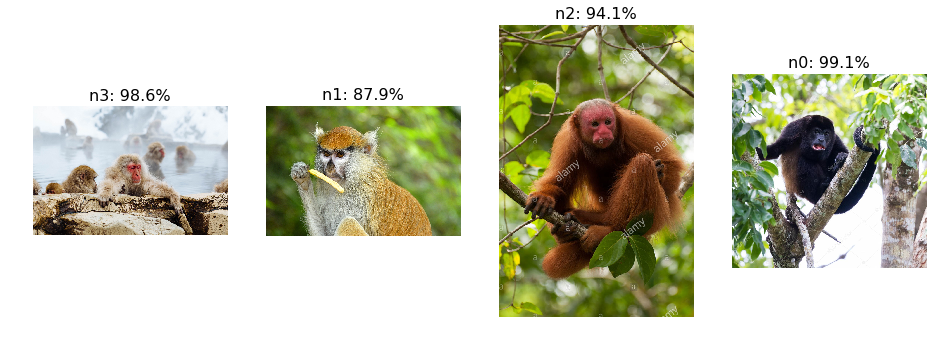

In [191]:
plot_val_with_title(rand_by_correct(True, preds), "Correctly classified", probs, classes)

Incorrectly classified


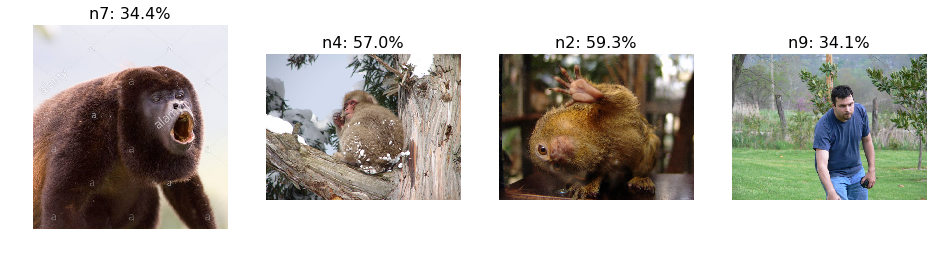

In [192]:
plot_val_with_title(rand_by_correct(False, preds), "Incorrectly classified", probs, classes)

Most uncertain predictions


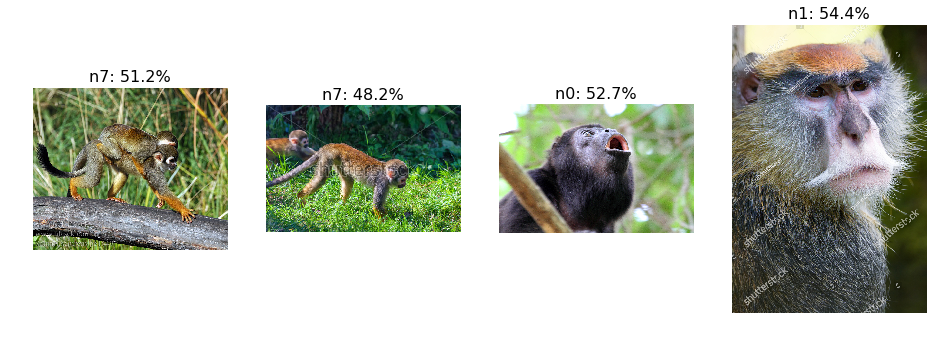

In [193]:
most_uncertain = np.argsort(np.abs(probs - 0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions", probs, classes)